<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-06
# DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling
# module4-sequence-your-narrative/

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import plotly

from google.colab import files

%matplotlib inline
# pd.options.display.max_columns = 500
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# import warnings
# warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [3]:
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__, "(>=0.9.0)")

Pandas version: 0.24.2
Seaborn version: 0.9.0 (>=0.9.0)


In [0]:
# If ran into some error
# !pip install pandas==0.23.4

_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [5]:
sns.__version__

'0.9.0'

In [0]:
# !pip install --upgrade seaborn

## More imports

In [0]:
## moved all imports to the top

# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [13]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [0]:
datasets = [income, lifespan, population, entities, concepts]
def print_columns(datasets):
  for d in datasets:
    name =[x for x in globals() if globals()[x] is d][0]
    print(name, d.shape)
    print(d.columns.tolist())
# print_columns(datasets)

In [15]:
# country, year, income
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [16]:
# country, year, lifespan
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [17]:
# country, year, population
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [18]:
# country, country name, region
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [19]:
# 
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [20]:
print_columns(datasets)

income (46513, 3)
['geo', 'time', 'income_per_person_gdppercapita_ppp_inflation_adjusted']
lifespan (44370, 3)
['geo', 'time', 'life_expectancy_years']
population (59297, 3)
['geo', 'time', 'population_total']
entities (273, 33)
['country', 'alt_5', 'alternative_1', 'alternative_2', 'alternative_3', 'alternative_4_cdiac', 'arb1', 'arb2', 'arb3', 'arb4', 'arb5', 'arb6', 'g77_and_oecd_countries', 'gapminder_list', 'god_id', 'gwid', 'income_groups', 'is--country', 'iso3166_1_alpha2', 'iso3166_1_alpha3', 'iso3166_1_numeric', 'iso3166_2', 'landlocked', 'latitude', 'longitude', 'main_religion_2008', 'name', 'pandg', 'un_state', 'unicode_region_subtag', 'upper_case_name', 'world_4region', 'world_6region']
concepts (590, 16)
['concept', 'color', 'concept_type', 'description', 'description_long', 'domain', 'drill_up', 'indicator_url', 'name', 'name_catalog', 'name_short', 'scales', 'source', 'source_long', 'source_url', 'tags']


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [21]:
my_data = (income.merge(lifespan)
           .merge(population)
           .merge(entities[['country', 'name', 'world_6region']], 
                  left_on='geo', right_on='country'))
my_data.head(2)

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia


In [22]:
my_data.drop(labels=['geo', 'country'], axis=1, inplace=True)
my_data.head(2)

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia


In [0]:
my_data.columns = ['year', 'income', 'lifespan', 'population', 'country', 'region']
my_data = my_data[['region', 'country', 'year', 'income', 'lifespan', 'population']]
my_data.head(2)

**[str.replace(old, new[, max])](https://www.programiz.com/python-programming/methods/string/replace)**  
**[DataFrame.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html#pandas.DataFrame.replace)**  

In [24]:
# str.replace()
my_data['region'] = my_data['region'].str.replace('_', ' ')
my_data['region'] = my_data['region'].str.title()
my_data['region'].sample(5)

15533                     America
10919    Middle East North Africa
9791     Middle East North Africa
1214          Europe Central Asia
1500                      America
Name: region, dtype: object

## Explore data

In [26]:
my_data.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [0]:
years = ['1800', '1909', '2018']

In [31]:
region_mean = my_data[my_data['year'].isin(years)].groupby(by=['region', 'year']).mean()
region_mean

income   lifespan    population
region                   year                                       
America                  1800   1035.181818  31.775152  8.154307e+05
                         1909   2650.030303  33.925152  5.293560e+06
                         2018  15926.090909  75.820303  3.061296e+07
East Asia Pacific        1800    810.269231  29.659615  1.552274e+07
                         1909   1664.692308  31.577308  2.260840e+07
                         2018  18091.153846  72.561923  8.915592e+07
Europe Central Asia      1800   1305.632653  34.241020  4.462660e+06
                         1909   3267.326531  41.848163  9.509292e+06
                         2018  29841.591837  77.963469  1.865013e+07
Middle East North Africa 1800    949.100000  30.285500  1.273842e+06
                         1909   1711.200000  31.161500  2.373995e+06
                         2018  27664.150000  75.500500  2.255581e+07
South Asia               1800    821.875000  28.975000  2.617903e+07
                         1909   1138.875000  28.182500  3.986377e+07
                         2018   6927.375000  71.675000  2.261803e+08
Sub Saharan Africa       1800    606.416667  30.448958  1.304398e+06
                         1909    911.562500  32.122292  2.274614e+06
                         2018   4795.625000  64.086042  2.269852e+07

**Pandas 0.23.4 error**  
<img src="https://github.com/Nov05/pictures/blob/master/pic001/2019-06-07%2000_14_39-LS_DS_124_Sequence_your_narrative.ipynb%20-%20Colaboratory.png?raw=true" width="500">

In [82]:
region_mean.reset_index(level=1).head(4)

,year,income,lifespan,population
region,,,,
America,1800,1035.181818,31.775152,8.154307e+05
America,1909,2650.030303,33.925152,5.293560e+06
America,2018,15926.090909,75.820303,3.061296e+07
East Asia Pacific,1800,810.269231,29.659615,1.552274e+07


https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.bar.html  
https://seaborn.pydata.org/generated/seaborn.barplot.html  
https://seaborn.pydata.org/tutorial/color_palettes.html  

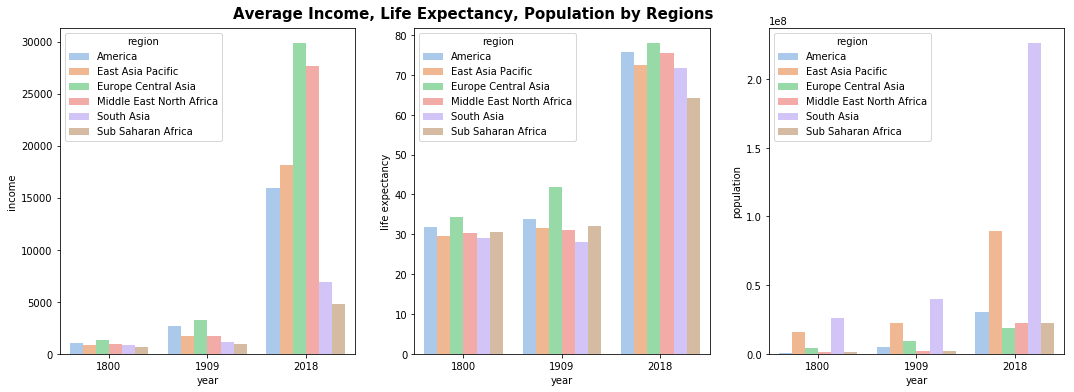

In [96]:
fig = plt.figure(figsize=(18,6))
axes = fig.subplots(1,3)

for i, y in enumerate(['income', 'lifespan', 'population']):
  sns.barplot(
      x='year',
      y=y,
      data=region_mean.reset_index(),
      hue='region',
      palette='pastel',
      ax=axes[i]
  );

axes[1].set_ylabel(ylabel='life expectancy')  
plt.title(label='Average Income, Life Expectancy, Population by Regions',
          x=-1, y=1.01,
          fontsize=15, fontweight='bold');

## Plot visualization

## Analyze outliers

## Plot multiple years

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project